# Glx in CGs  (462 cg)

In [1]:
L<-read.table("../data/compact_in_gg_m3_full")
N<-read.table("../data/compact_in_node_m3_full")
NE<-read.table("../data/compact_in_field_m3_full")
F<-read.table("../data/compact_in_filaments_m3_full")
V<-read.table("../data/compact_in_voids_m3_full")
T<-read.table("../data/compact_in_all")

gal_all<-read.table("../../catalogos/tab_gal_gru_full2.dat")
#gal_all<-read.table("../data/tab_gal_gru.dat")

colnames(L)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c('igru','nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(N)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(NE)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <-  c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(F)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2')
                                                                                                                                                                          
colnames(V)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)] <- c("igru",'nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2','tipo','estado')

colnames(gal_all)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)] <-c("igru", "Nm", "RA", "Dec", "Redshift", "mag_r", "mag_g", "mag_g", "galid", "r50", "r90", "rabs", "gabs", "uabs", "passive", "early", "cparam")
#colnames(gal_all)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)] <-c("igru", "Nm", "RA", "Dec", "Redshift", "mag_r", "mag_g", "mag_g", "galid", "r50", "r90", "rabs", "gabs", "uabs", "passive", "early")

colnames(T)[c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)] <- c('igru','nmi','alcm','delcm','zmedian','radio_mins','mu','sigv','rmag_bri','flag','rabs1','dij','tcr','rp','rabs2','entorno')

In [2]:
head(T,2)
head(gal_all,2)

igru,nmi,alcm,delcm,zmedian,radio_mins,mu,sigv,rmag_bri,flag,rabs1,dij,tcr,rp,rabs2,entorno
2,4,116.577,22.020,0.046817,4.090,25.289,274.092,14.289,0,-21.512,0.0923132,0.0305440,82.54371,-20.895,Loose
4,5,117.794,50.217,0.021810,5.095,23.789,409.803,12.839,0,-21.235,0.0555815,0.0123003,48.17682,-21.207,Loose


igru,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
1,1,114.844,45.118,0.079785,14.719,15.661,18.91,1.237664e+18,6.580098,20.917290,-22.38191,-21.56168,-19.65829,1,1,3.17887
1,2,114.840,45.124,0.077575,16.380,16.885,18.36,1.237664e+18,2.361705,5.640143,-20.61242,-20.12822,-18.97008,0,0,2.38817


# Glx in CG in Volume-limited sample (449 cg)

In [3]:
igru_v1 = T$igru
length(igru_v1)

gal_v1 = data.frame()

for (j in 1:length(igru_v1)){
    
    gal = subset(gal_all, gal_all$igru ==  igru_v1[j])
    gal_v1 <- rbind(gal_v1,gal)
    #print(gal_v1$igru)
}

length(gal_all$igru)
length(gal_v1$igru)

[1] 449

[1] 2070

[1] 2012

In [4]:
head(gal_v1,2)

,igru,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g.1,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
5,2,1,116.553,21.996,0.045715,14.289,15.159,18.923,1.237658e+18,4.118502,14.23286,-21.52291,-20.69774,-18.84521,1,1,3.45583
6,2,2,116.610,22.034,0.047243,14.982,15.809,20.368,1.237660e+18,3.411490,10.92645,-20.90301,-20.12568,-18.39918,1,1,3.20284


In [5]:
col_ur = gal_v1$uabs - gal_v1$rabs
c_index = gal_v1$cparam

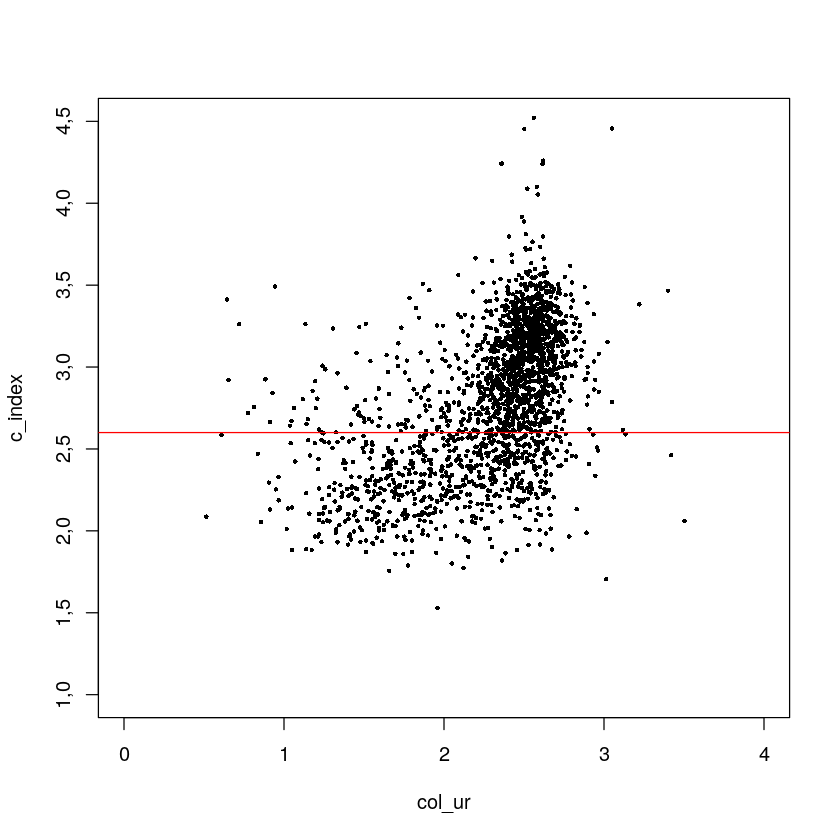

In [6]:
plot(col_ur, c_index, xlim=c(0,4), ylim=c(1,4.5), pch=16, cex=0.5
    )
abline(h=2.6, col='red')

In [7]:
col_ur_red = subset(col_ur, gal_v1$passive==1)
c_index_red = subset(c_index, gal_v1$passive==1)
col_ur_blue = subset(col_ur, gal_v1$passive==0)
c_index_blue = subset(c_index, gal_v1$passive==0)

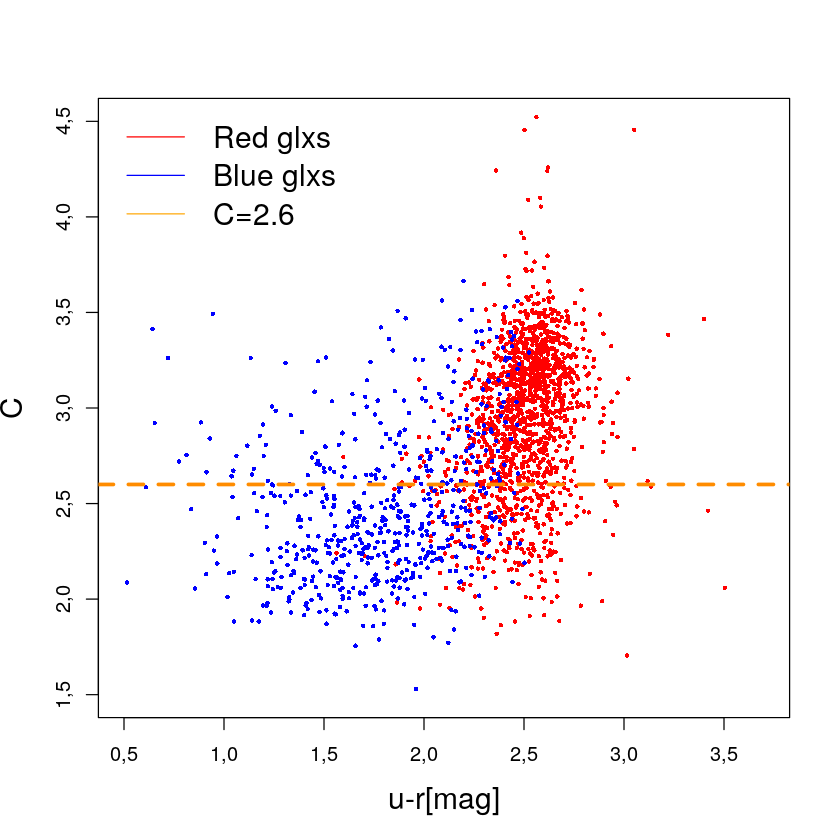

In [8]:
#cairo_ps("cparam_color_galcg.eps")

plot(col_ur_red, c_index_red, xlim=c(0.5,3.7), ylim=c(1.5,4.5), pch=16, cex=0.5, col='red',
     xlab='u-r[mag]', ylab='C', cex.axis=1.0, cex.lab=1.5)
points(col_ur_blue, c_index_blue, pch=16, cex=0.5, col='blue')
abline(h=2.6, col='darkorange', lty=2, lwd=3)
legend('topleft', legend=c("Red glxs", "Blue glxs", "C=2.6"),
       col=c("red", "blue","orange"), lty=1:1:1, cex=1.5, bty = "n")

#dev.off()

### Red + early gal in v1

In [9]:
df_red_early =  subset(gal_v1, gal_v1$passive == 1 & gal_v1$early == 1)

print('Glx en cg en V1')
length(gal_v1$igru)

print('Glx red + early')
length(df_red_early$igru)

print('% Glx red + early')
length(df_red_early$igru)/length(gal_v1$igru)

[1] "Glx en cg en V1"


[1] 2012

[1] "Glx red + early"


[1] 1128

[1] "% Glx red + early"


[1] 0,5606362

# Gal in CG red

In [10]:
df_red = subset(gal_v1, gal_v1$passive==1)
head(df_red,2)

,igru,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g.1,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
5,2,1,"116,553","21,996","0,045715","14,289","15,159","18,923","1,237658e+18","4,118502","14,23286","-21,52291","-20,69774","-18,84521",1,1,"3,45583"
6,2,2,"116,610","22,034","0,047243","14,982","15,809","20,368","1,237660e+18","3,411490","10,92645","-20,90301","-20,12568","-18,39918",1,1,"3,20284"


In [11]:
N_tot = length(gal_v1$galid)
N_tot
N_red = length(df_red$galid)
N_red

[1] 2012

[1] 1419

### De las 1419 glx rojas, cuantas son early?

In [12]:
N_red_early = length(subset(df_red$igru, df_red$early == 1))
N_red_early
N_red_early/N_red

[1] 1128

[1] 0,794926

# Gal in CG early-type

In [13]:
df_early = subset(gal_v1, gal_v1$early==1)
head(df_early,2)

,igru,Nm,RA,Dec,Redshift,mag_r,mag_g,mag_g.1,galid,r50,r90,rabs,gabs,uabs,passive,early,cparam
5,2,1,"116,553","21,996","0,045715","14,289","15,159","18,923","1,237658e+18","4,118502","14,23286","-21,52291","-20,69774","-18,84521",1,1,"3,45583"
6,2,2,"116,610","22,034","0,047243","14,982","15,809","20,368","1,237660e+18","3,411490","10,92645","-20,90301","-20,12568","-18,39918",1,1,"3,20284"


In [14]:
N_early = length(df_early$galid)
N_early

[1] 1325

### De las 1325 glx early-type, cuantas son rojas?

In [15]:
N_early_red = length(subset(df_early$igru, df_early$passive == 1))
N_early_red
N_early_red/N_early

[1] 1128

[1] 0,8513208